In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('s:/projects/Bank_Customer_Churn_Prediction/data/Churn_Modelling.csv')

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis='columns', inplace=True)

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Data Analysis

In [7]:
df.nunique()

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64

#### Plot a Pie Chart

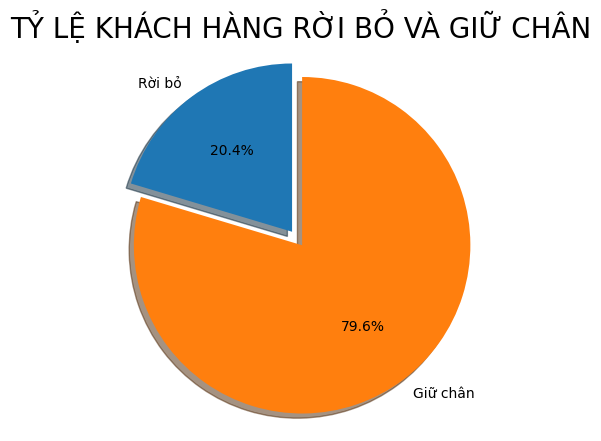

In [8]:
labels = 'Rời bỏ', 'Giữ chân'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(7, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("TỶ LỆ KHÁCH HÀNG RỜI BỎ VÀ GIỮ CHÂN", size = 20)
plt.show()

<Axes: xlabel='IsActiveMember', ylabel='count'>

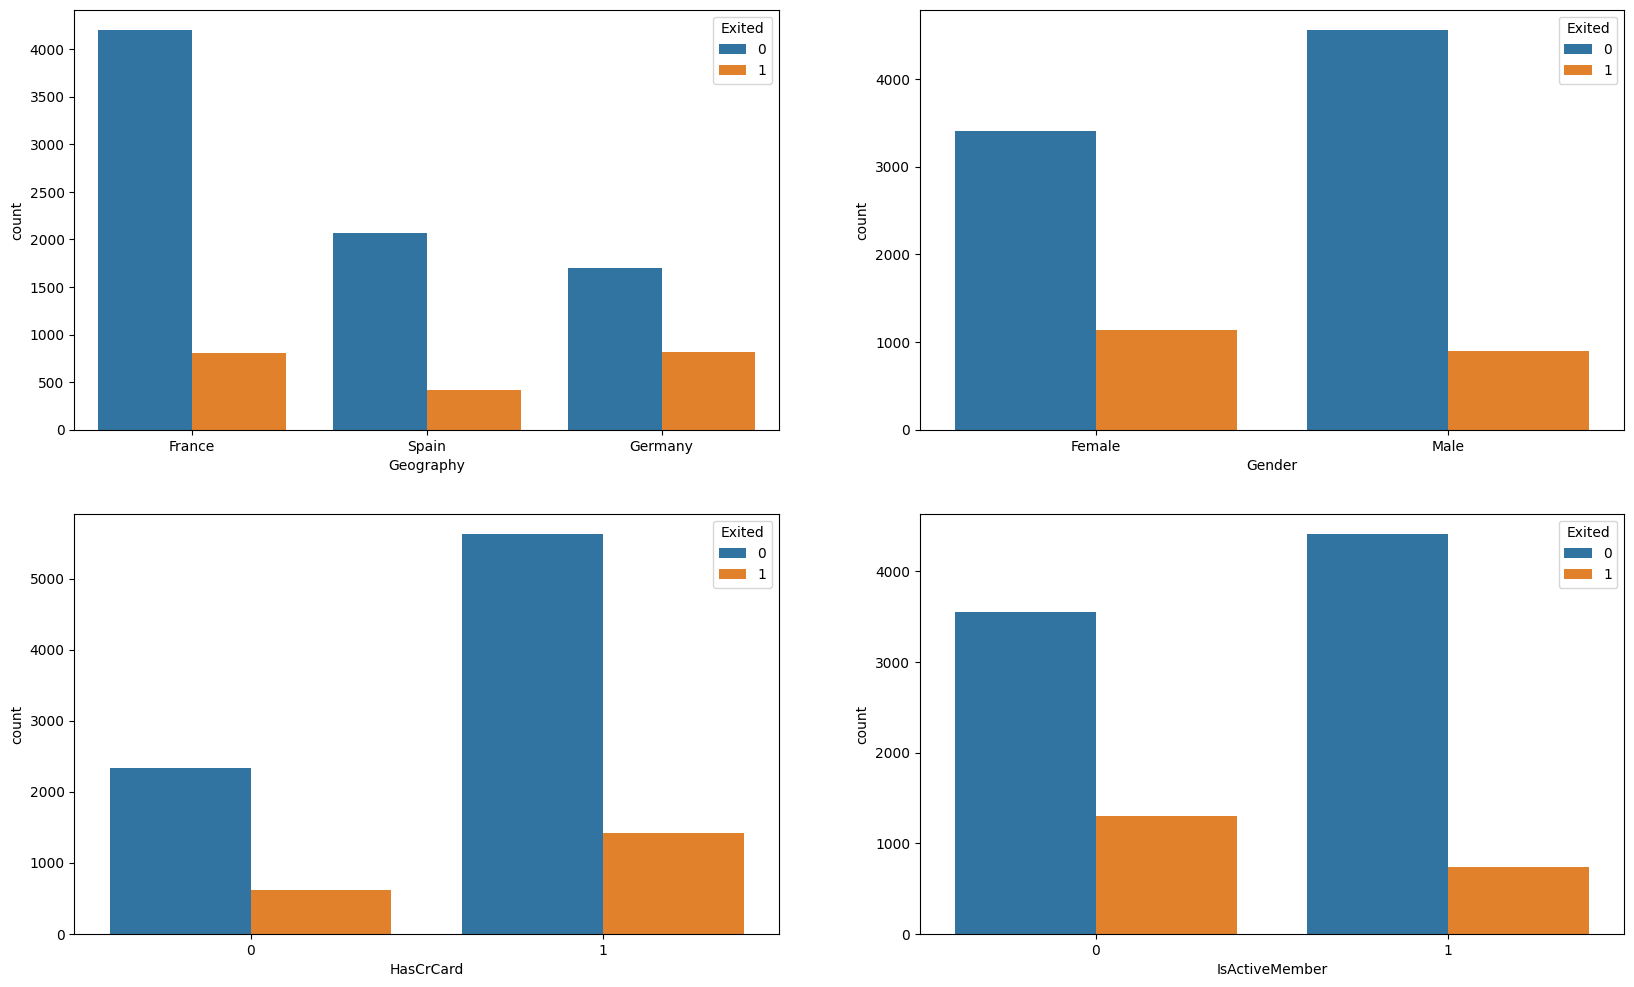

In [9]:
# Trực quan hóa các biến hạng mục
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x = 'Gender', hue = 'Exited', data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited', data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited', data = df, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

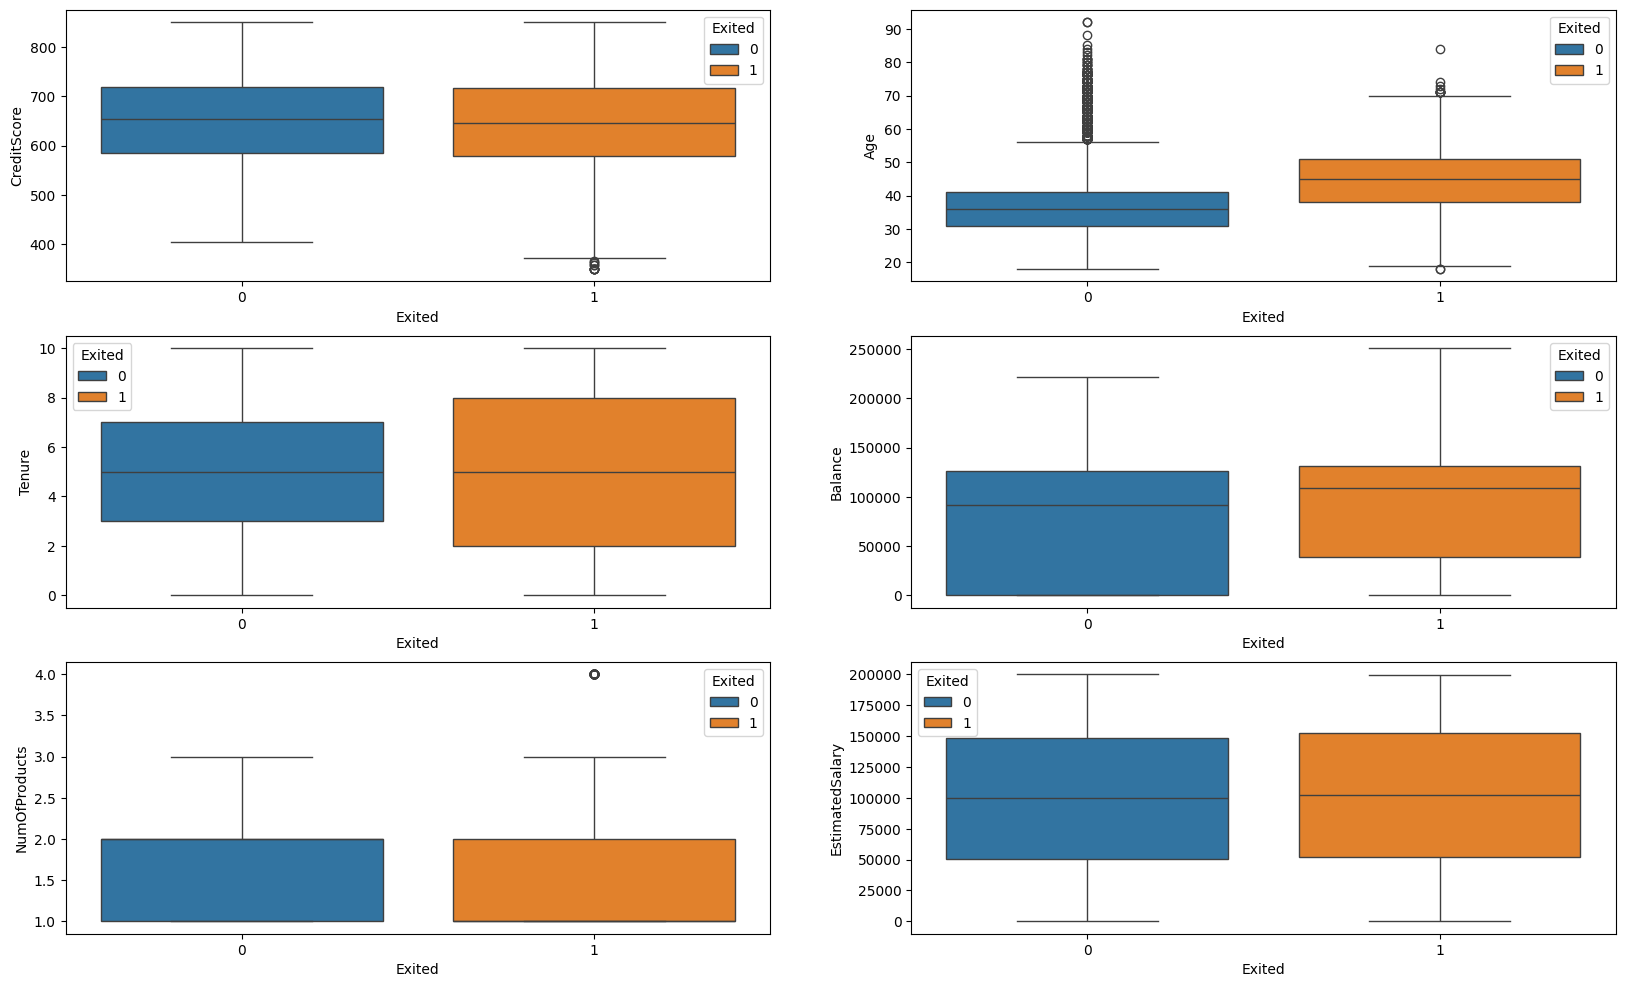

In [10]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = df, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1])

### Features Engineering

#### Making a new column Balance Salary Ratio

###### Công thức Balance / EstimatedSalary được sử dụng trong ngành tín dụng để đo lường mức độ nợ của một cá nhân so với thu nhập ước tính của họ. Công thức này được tính bằng cách chia số dư còn lại trên tài khoản hoặc tín dụng của khách hàng cho thu nhập ước tính của họ. Điều này giúp các tổ chức tín dụng đánh giá khả năng thanh toán của một khách hàng dựa trên mức độ nợ của họ so với thu nhập.

###### Balance = Số dư còn lại trên tài khoản hoặc tín dụng của khách hàng
###### EstimatedSalary = Thu nhập ước tính của họ

(-1.0, 5.0)

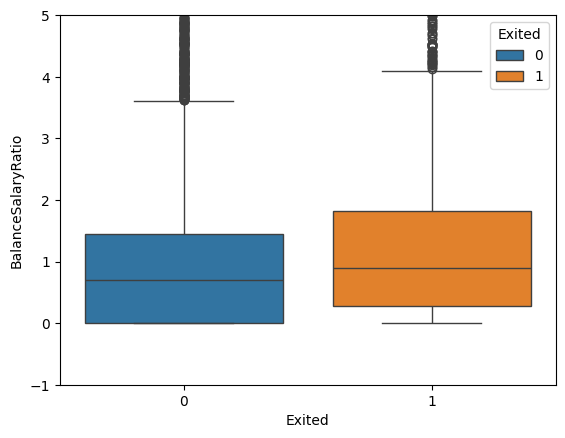

In [11]:
df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 5)

###### Công thức Tenure / Age được sử dụng trong ngành tài chính để đánh giá mối quan hệ giữa thời gian một khách hàng đã sử dụng dịch vụ của một tổ chức và độ tuổi của họ. Công thức này thường được sử dụng để đánh giá độ trung thành của khách hàng và độ ổn định của họ.

###### Tenure = Thời gian một khách hàng đã sử dụng dịch vụ của một tổ chức
###### Age = Độ tuổi của họ

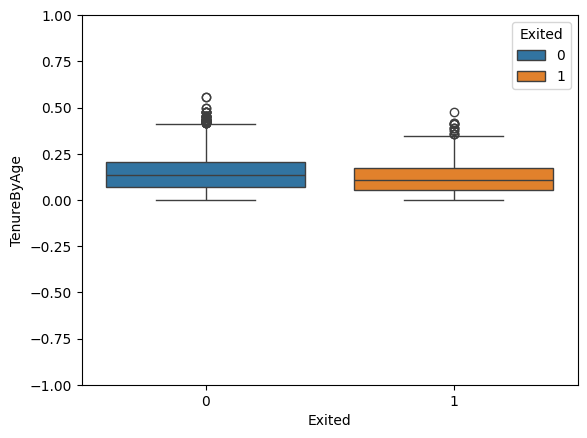

In [12]:
df['TenureByAge'] = df.Tenure/(df.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df)
plt.ylim(-1, 1)
plt.show()

#### Printing the categorical variables unique values

In [13]:
def print_unique_col_values(df):
    for column in df:
        if df[column].dtypes == 'object':
            print(f'{column}: {df[column].unique()}')

In [14]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


#### Label Ecoding

In [15]:
df['Gender'].replace({'Male': 1, 'Female':0}, inplace=True)

C:\Users\Du Phat Minh\AppData\Local\Temp\ipykernel_28884\3642771212.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace({'Male': 1, 'Female':0}, inplace=True)
C:\Users\Du Phat Minh\AppData\Local\Temp\ipykernel_28884\3642771212.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  

#### One Hot Encoding Method

In [16]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,False,False,True


#### Standardized data


In [17]:
scale_var = ['Tenure', 'CreditScore', 'Age', 'Balance', 'NumOfProducts', 'EstimatedSalary']

scaler = MinMaxScaler()
df1[scale_var] = scaler.fit_transform(df1[scale_var])

In [18]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,True,False,False
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,False,False,True
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,True,False,False
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,True,False,False
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,False,False,True


### Train Test Split

In [19]:
X = df1.drop('Exited', axis='columns') ##indepenent features
y = df1['Exited'] ##dependent features

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [20]:
len(X_train.columns)

14